## Creating a Regression from Scratch

In [29]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read in Data
data = pickle.load(open('regression-data.pkl', 'rb'), encoding='latin1')
type(data)
data

{'testy': array([[ 0.81263775,  0.42678311, -0.17916003, -1.13202584, -1.05634429,
          0.88014249,  0.2570215 , -0.80181248, -0.8286761 , -1.11011136]]),
 'testx': array([[-0.6699682 , -0.60210492, -0.40807659, -0.34897672, -0.29669472,
          0.09517231,  0.50929538,  0.63857399,  0.7137006 ,  0.76787296]]),
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Jan 24 18:53:41 2015',
 '__globals__': [],
 '__version__': '1.0',
 'trainx': array([[-0.99210347, -0.9584961 , -0.82332037, -0.66177833, -0.60387427,
         -0.55040671, -0.41624786, -0.00298598,  0.02438453,  0.22505213,
          0.26729647,  0.37071964,  0.42915157,  0.44351063,  0.49760777,
          0.52106142,  0.54264129,  0.62524192,  0.83554825,  0.90678669]]),
 'trainy': array([[ 0.07911494, -0.11851195,  0.78883217,  0.93402604,  0.54229233,
          0.28598714, -0.43386955, -0.01451211,  0.19900357,  1.09199998,
          1.05134834,  0.7446898 ,  0.68514156,  0.19879247, -0.24147735,
  

In [3]:
# Split training and test sets
training_X = data['trainx'][0]
training_y = data['trainy'][0]
test_X = data['testx'][0]
test_y = data['testy'][0]
training_X

array([-0.99210347, -0.9584961 , -0.82332037, -0.66177833, -0.60387427,
       -0.55040671, -0.41624786, -0.00298598,  0.02438453,  0.22505213,
        0.26729647,  0.37071964,  0.42915157,  0.44351063,  0.49760777,
        0.52106142,  0.54264129,  0.62524192,  0.83554825,  0.90678669])

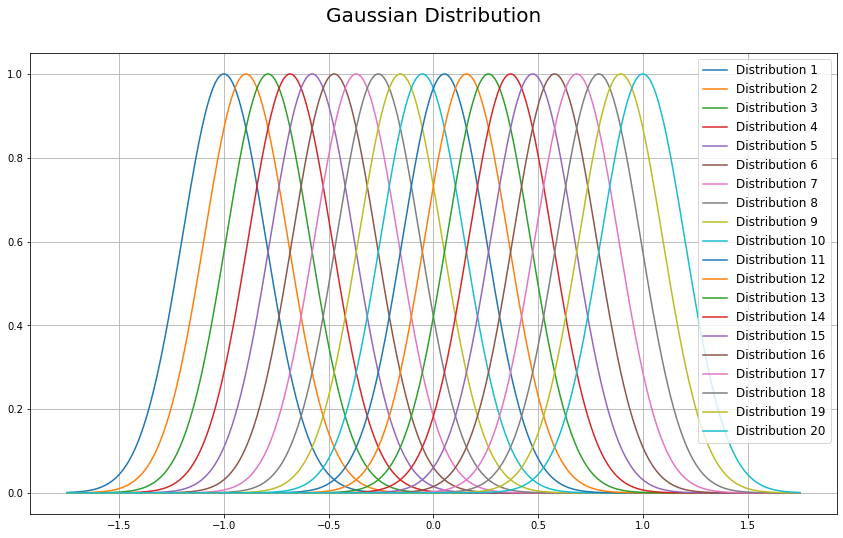

In [4]:
# Plot 20 gaussians between -1 to 0.1 with standard deviation 0.2 and evenly spaced means
fig = plt.figure(figsize = (14,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.suptitle('Gaussian Distribution', fontsize=20)
ax.grid()

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-1.75, 1.75, 1000)
mu_list = np.linspace(-1,1,20)
sig = [0.2]*len(mu_list)

counter = 0
for mu, sig in zip(mu_list,sig):
    counter = counter + 1
    plt.plot(x_values, gaussian(x_values, mu, sig), label = 'Distribution ' + str(counter))

plt.legend(loc="best", prop={'size': 12})
plt.show()

In [5]:
# Gaussians created using training X for predicting
all_gaussians_training = []
for i in mu_list:
    gaussian_func = gaussian(training_X, i, 0.2)
    all_gaussians_training.append(gaussian_func)
all_gaussians_training = np.array(all_gaussians_training).T

In [16]:
# Gaussians created using test X for predicting
all_gaussians_test = []
for i in mu_list:
    gaussian_func = gaussian(test_X, i, 0.2)
    all_gaussians_test.append(gaussian_func)
all_gaussians_test = np.array(all_gaussians_test).T

In [6]:
# Function used to retrieve weights
def regularized_least_squares(all_gaussians, lambda_value, training_y):
    first_term = np.dot(all_gaussians.T, all_gaussians)
    second_term = lambda_value * np.identity(20)
    third_term = np.dot(all_gaussians.T, training_y)
    return np.dot(np.linalg.inv(first_term + second_term),third_term)

In [7]:
# Function to find sum squared errors
def sum_squared_errors(labels,model_data):
    summation = (labels-model_data)**2
    summation = np.sum(summation)
    return summation

In [8]:
# Regularization values to test
lambda_values = [10,1e-2,1e-5,1e-8]

In [9]:
weights = [regularized_least_squares(all_gaussians_training, lambda_values[0], training_y),
           regularized_least_squares(all_gaussians_training, lambda_values[1], training_y),
           regularized_least_squares(all_gaussians_training, lambda_values[2], training_y),
           regularized_least_squares(all_gaussians_training, lambda_values[3], training_y)]
           
weights

[array([ 0.01681617,  0.05417138,  0.09068839,  0.10087257,  0.0742535 ,
         0.02719045, -0.01224006, -0.02801502, -0.01931623,  0.01308995,
         0.06758923,  0.12555832,  0.15015716,  0.11594342,  0.03627879,
        -0.04835937, -0.10509922, -0.12419729, -0.11113294, -0.07895306]),
 array([-6.87274391e-01, -6.91985258e-02,  7.62078767e-01,  7.73225364e-01,
         4.66247811e-02, -4.06281941e-01, -2.59883108e-01, -1.09231890e-01,
        -3.00484154e-01, -4.42018464e-01, -4.84165116e-02,  6.66178855e-01,
         8.22614995e-01,  1.32704928e-01, -3.61288048e-01, -5.05987124e-02,
        -1.89382155e-04, -6.42906715e-01, -6.20237035e-01,  5.59720439e-01]),
 array([  9.88012293, -22.28823591,  15.56988795,   7.712171  ,
        -16.00067164,   1.46194982,  13.55758828,  -6.92586274,
        -12.3297384 ,  10.09091728,   9.06063768, -15.40672555,
         -1.23069545,  20.38003384, -10.73065036, -17.15083662,
         23.07433204,   5.01043901, -32.48658873,  22.56554252]),
 a

In [10]:
plotting_step_size = np.linspace(-1,1,41)
plotting_step_size

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ])

In [11]:
all_models = []
for i in mu_list:
    gaussian_func = gaussian(plotting_step_size, i, 0.2)
    all_models.append(gaussian_func)
all_models = np.array(all_models).T

In [12]:
training_SSE = []
test_SSE = []

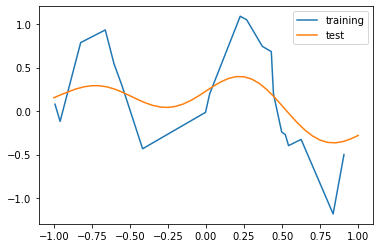

In [13]:
model_values = np.dot(all_models,weights[0])
plt.plot(training_X,training_y,label = 'training')
plt.plot(plotting_step_size,model_values, label = 'test')
plt.legend()

In [14]:
training_SSE.append(sum_squared_errors(training_y,all_gaussians_training.dot(weights[0])))
training_SSE[0]

3.6285377241087615

In [17]:
test_SSE.append(sum_squared_errors(test_y,all_gaussians_test.dot(weights[0])))
test_SSE[0]

4.601090505436561

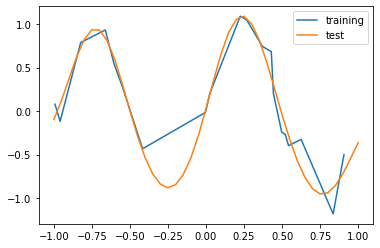

In [18]:
model_values = np.dot(all_models,weights[1])
plt.plot(training_X,training_y,label = 'training')
plt.plot(plotting_step_size,model_values, label = 'test')
plt.legend()

In [19]:
training_SSE.append(sum_squared_errors(training_y,all_gaussians_training.dot(weights[1])))
training_SSE[1]

0.49405230576690023

In [20]:
test_SSE.append(sum_squared_errors(test_y,all_gaussians_test.dot(weights[1])))
test_SSE[1]

0.5686085664722704

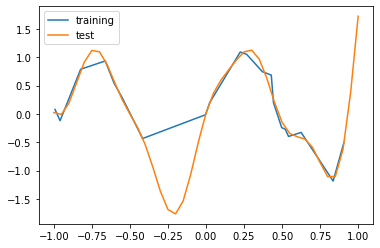

In [21]:
model_values = np.dot(all_models,weights[2])
plt.plot(training_X,training_y,label = 'training')
plt.plot(plotting_step_size,model_values, label = 'test')
plt.legend()

In [22]:
training_SSE.append(sum_squared_errors(training_y,all_gaussians_training.dot(weights[2])))
training_SSE[2]

0.16096436436362796

In [23]:
test_SSE.append(sum_squared_errors(test_y,all_gaussians_test.dot(weights[2])))
test_SSE[2]

0.7707185930006039

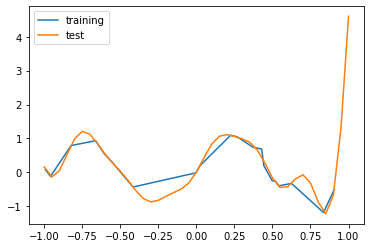

In [24]:
model_values = np.dot(all_models,weights[3])
plt.plot(training_X,training_y,label = 'training')
plt.plot(plotting_step_size,model_values, label = 'test')
plt.legend()

In [25]:
training_SSE.append(sum_squared_errors(training_y,all_gaussians_training.dot(weights[3])))
training_SSE[3]

0.08882043462436924

In [26]:
test_SSE.append(sum_squared_errors(test_y,all_gaussians_test.dot(weights[3])))
test_SSE[3]

1.7621722445541537

In [27]:
ln_lambda = np.log(lambda_values)

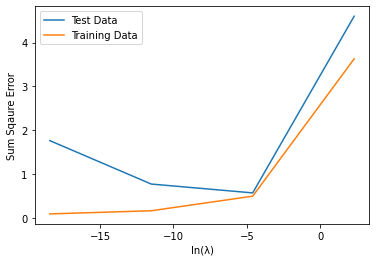

In [28]:
plt.plot(ln_lambda,test_SSE, label = 'Test Data')
plt.plot(ln_lambda,training_SSE, label = 'Training Data')
plt.xlabel('ln(λ)')
plt.ylabel('Sum Sqaure Error')
plt.legend(loc="best")